In [1]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100,n_classes=2,n_clusters_per_class=1,n_informative=1,n_redundant=0,n_features=2,hypercube=False,random_state=41,class_sep=10)

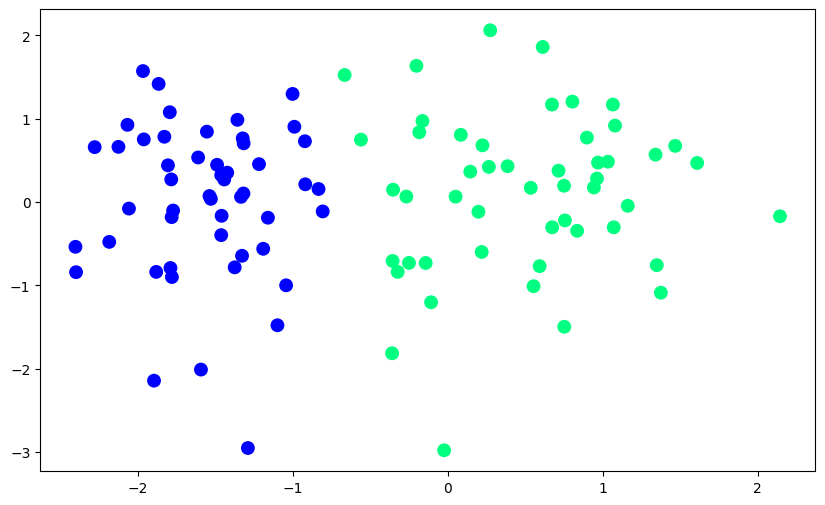

In [2]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap ="winter",s=80)

In [3]:
##imports
import numpy as np
import random

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [5]:
import math

In [125]:
import numpy as np

class Perceptron:
    def __init__(self):
        self._intercept = None
        self._coef = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))  # Use NumPy for array compatibility

    def improve(self, w, X, y, preds):
        lr = 0.5
        m = len(X)
        preds = np.array(preds)
        error = y - preds
        
        # print("error shape:", error.shape)  # Should be (100,)
        # print("X shape:", X.shape)  # Should be (100, 4) after adding intercept

        # Update weights correctly using the dot product
        w += (1 / m) * lr * np.dot(X.T, error)  # Correct weight update without loop

        return w

    def calculate_loss(self, preds, y, X):
        preds = np.array(preds)
        # Adding a small constant to avoid log(0)
        loss = (-1 / len(X)) * (np.dot(y, np.log(preds + 1e-15)) + np.dot(1 - y, np.log(1 - preds + 1e-15)))
        return loss

    def fit(self, X, y):
        weights = np.ones(X.shape[1] + 1)  # +1 for intercept
        X = np.insert(X, 0, 1, axis=1)  # Add intercept column

        for i in range(5000):  # You can increase this to train more epochs
            predictions = []
            for j in range(X.shape[0]):
                z = np.dot(weights, X[j])
                y_pred = self.sigmoid(z)
                predictions.append(y_pred)
            loss = self.calculate_loss(predictions, y, X)
            print("loss:", loss)
            weights = self.improve(weights, X, y, predictions)

        self._intercept = weights[0]
        self._coef = weights[1:]
        return predictions

# Example usage:
p = Perceptron()
preds = p.fit(X, y)


loss: 0.42523833477213385
loss: 0.36779744758227423
loss: 0.32738334550530357
loss: 0.29791469317051567
loss: 0.27562754885439034
loss: 0.25819684647060387
loss: 0.24415935222629415
loss: 0.2325688647952461
loss: 0.22279517034246665
loss: 0.2144061348289549
loss: 0.20709722737462677
loss: 0.200648361823223
loss: 0.19489678186180462
loss: 0.1897195910410025
loss: 0.18502222369545457
loss: 0.1807306634822843
loss: 0.17678608025957857
loss: 0.17314106116234423
loss: 0.16975691373154497
loss: 0.1666017034782099
loss: 0.16364880337982812
loss: 0.16087580603944573
loss: 0.15826369668905857
loss: 0.15579621649619088
loss: 0.15345936658189932
loss: 0.15124101740241438
loss: 0.1491305979690461
loss: 0.14711884624508026
loss: 0.1451976069159579
loss: 0.14335966620798535
loss: 0.14159861595098333
loss: 0.13990874092585237
loss: 0.13828492490370767
loss: 0.13672257180389688
loss: 0.135217539168311
loss: 0.1337660817357396
loss: 0.1323648033503481
loss: 0.13101061578708253
loss: 0.12970070334899814

In [126]:
preds


[0.999961683045486,
 0.987087141770387,
 0.9567419107427239,
 3.101176684663529e-06,
 0.9989062133540458,
 0.13014583508189795,
 3.4135951081815046e-06,
 0.9999296073935017,
 0.8628938423551707,
 3.559906588054715e-07,
 8.149176711918708e-07,
 1.4293482827991462e-06,
 0.9946437190033499,
 0.9999999903818907,
 1.7748034428100412e-06,
 0.9999973761138562,
 0.9963847446999194,
 2.563689449839489e-07,
 0.9983311960054229,
 1.7011038311158266e-06,
 7.581484637494321e-09,
 1.1673220032828415e-07,
 0.00044608223048521765,
 0.999999999998805,
 0.001956928865364758,
 0.9999999444507637,
 7.960549751968872e-07,
 0.004852988800904478,
 6.582783949704382e-10,
 1.7740533868617467e-06,
 0.00011689505210582206,
 0.9999999999283209,
 0.9999852156893917,
 0.9999994554562964,
 0.9999988594459092,
 0.967073664712004,
 0.0409837512800035,
 0.9999999525001921,
 1.946612367957191e-05,
 0.9999999459323532,
 0.00021919042507010644,
 0.05357009834215224,
 0.0005729363557024826,
 0.9999999999945188,
 0.14243698

In [127]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [128]:
weights = p._coef
weights=np.insert(weights,0,p._intercept)
weights


array([ 7.89093173, 11.9130685 ,  0.80686829])

In [129]:
m = -p._coef[0]/p._coef[1]
b = -p._intercept/p._coef[1]
x_input = np.linspace(-3,3,100)
y_input = m*x_input +b

In [130]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(penalty=None,solver='sag')
model = lr.fit(X,y)

C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [131]:
weights2 = model.coef_
weights2=np.insert(weights2,0,model.intercept_)
weights2


array([ 8.93955655, 13.48388276,  0.98719851])

In [132]:
m2 = -model.coef_[0][0]/model.coef_[0][1]
b2 = -model.intercept_[0]/model.coef_[0][1]
x_input2 = np.linspace(-3,3,100)
y_input2 = m2*x_input +b2

(-3.0, 2.0)

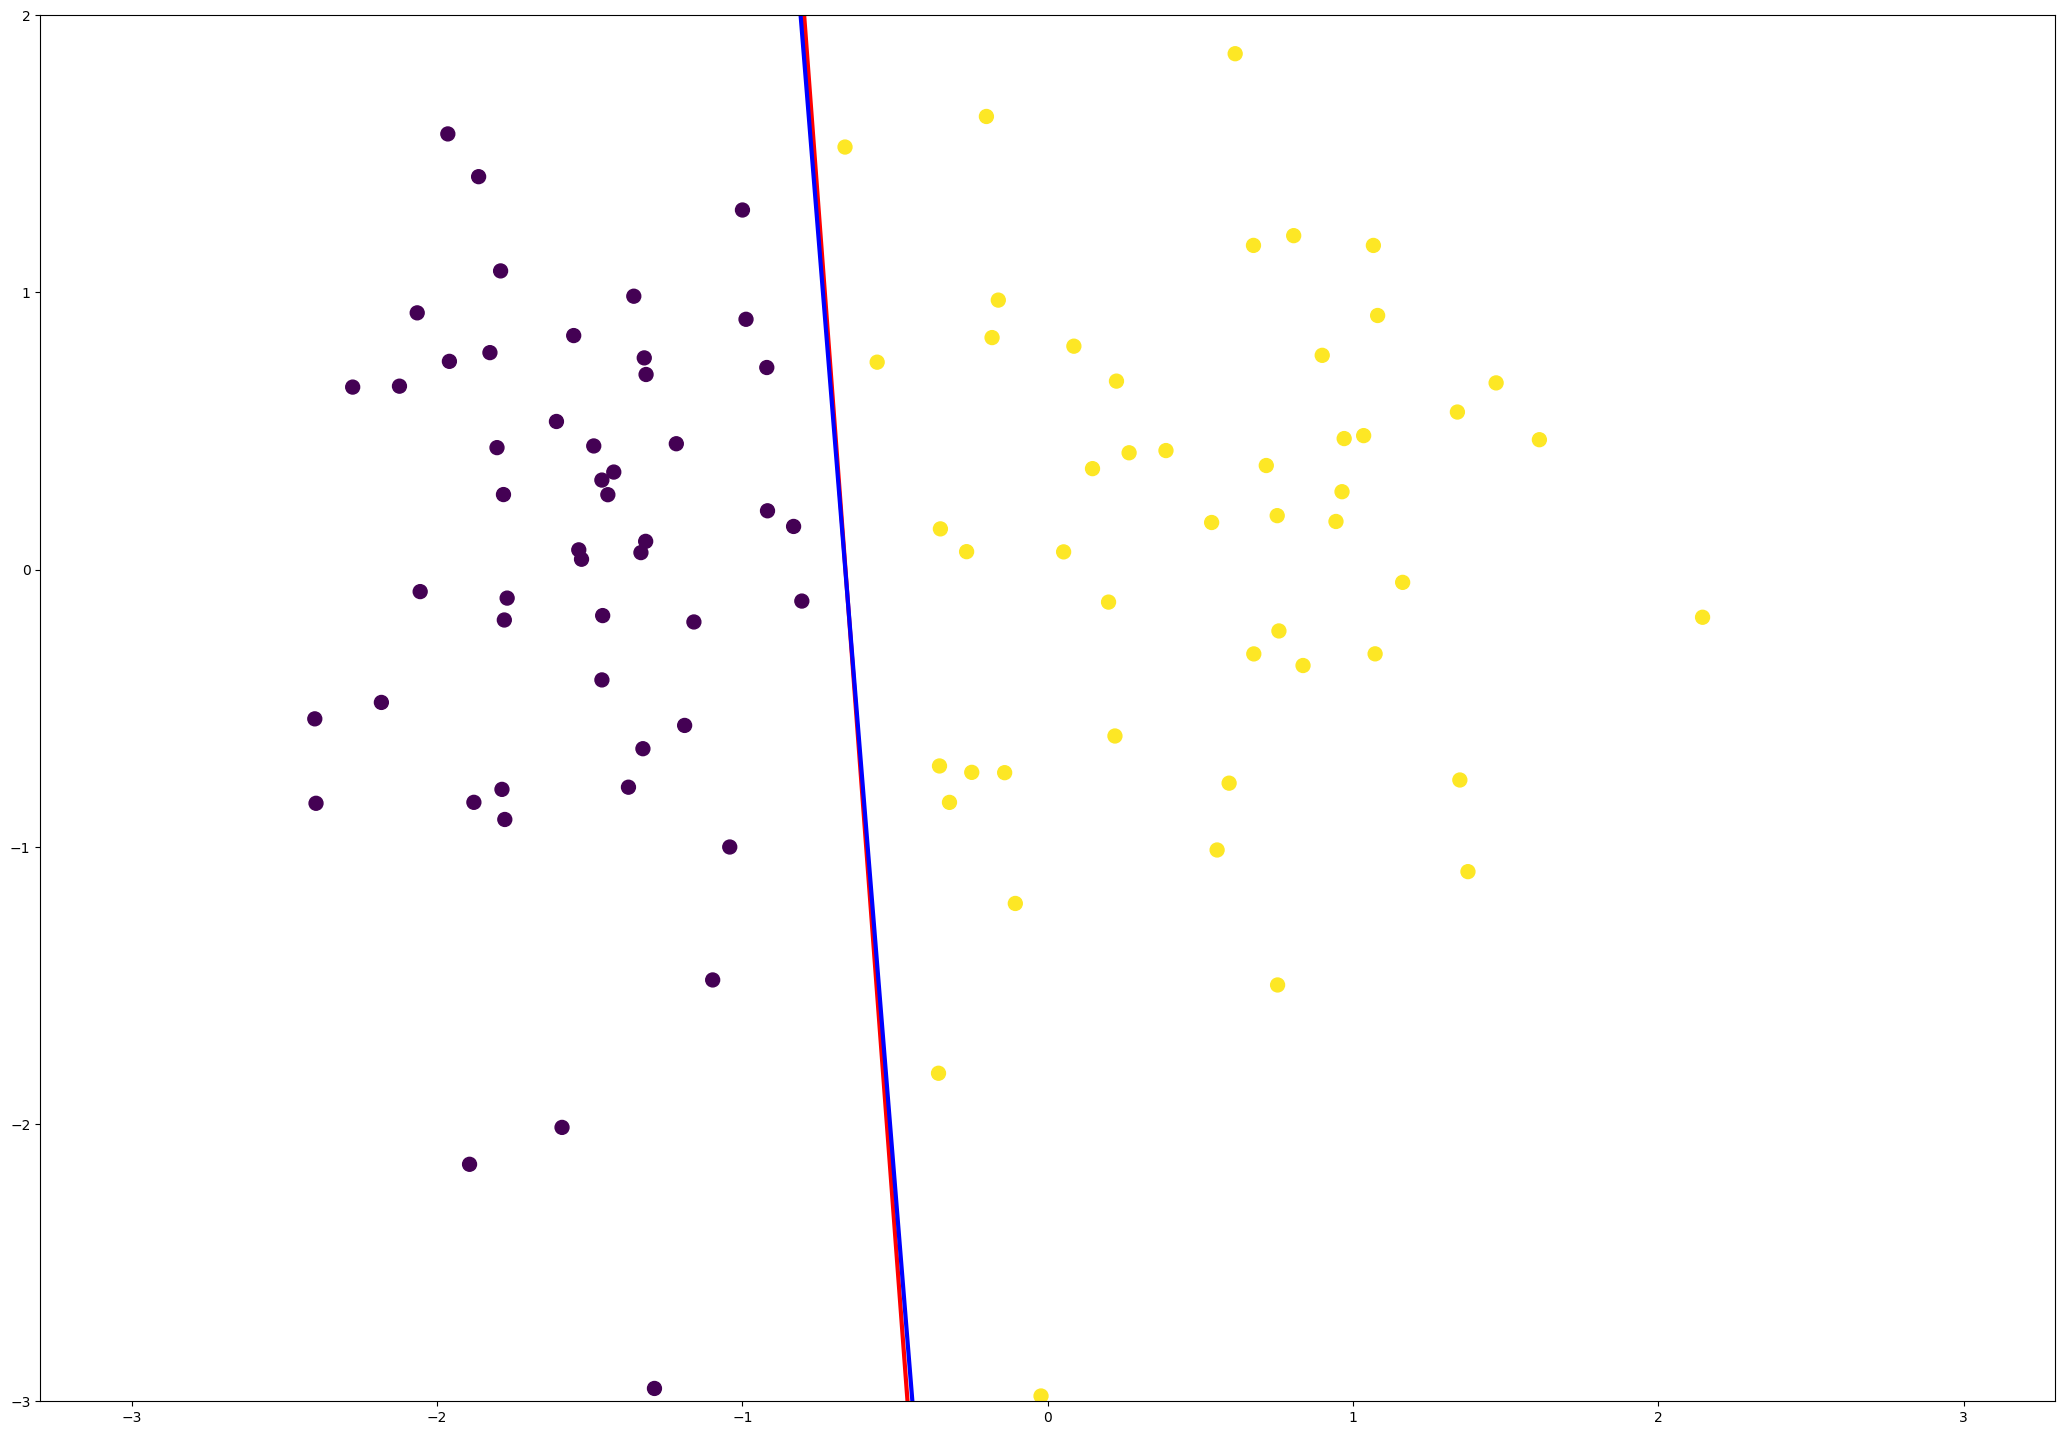

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(26,18))
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.plot(x_input,y_input,color="red",linewidth =3)
plt.plot(x_input2,y_input2,color="blue",linewidth =3)
plt.ylim(-3,2)